# Preprocessing

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/ML/

/content/drive/MyDrive/ML


In [4]:
data = "./"

In [5]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [6]:
import pickle

In [7]:
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [8]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)

In [9]:
with open(test_link, mode="rb") as f: 
  test = pickle.load(f)
  

In [10]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

số nhãn

In [11]:
trainX = train["features"]
trainY = train["labels"]

In [12]:
validX = valid["features"]
validY = valid["labels"]

In [13]:
testX = test["features"]
testY = test["labels"]

In [14]:
dataX = np.concatenate((trainX, validX, testX),axis=0)
dataY = np.concatenate((trainY, validY, testY),axis=0)

In [15]:
trainX.shape

(34799, 32, 32, 3)

In [16]:
import matplotlib.pyplot as plt


In [17]:
n_classes = len(set(trainY))
n_classes

43

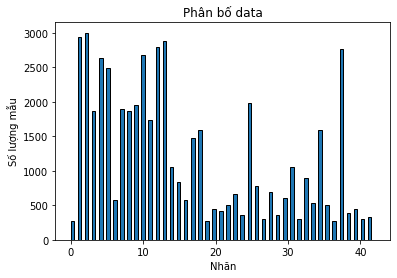

In [18]:
plt.hist(dataY, bins=43, edgecolor='black', width=0.5)
plt.title('Phân bố data') 
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu')
plt.show()

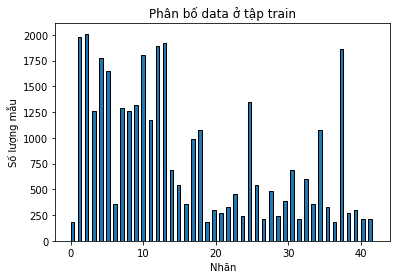

In [19]:
plt.hist(trainY, bins=43, edgecolor='black', width=0.5)
plt.title('Phân bố data ở tập train')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu')
plt.show()

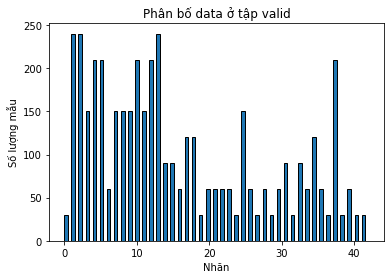

In [20]:
plt.hist(validY, bins=43, edgecolor='black', width=0.5)
plt.title('Phân bố data ở tập valid')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu')
plt.show()

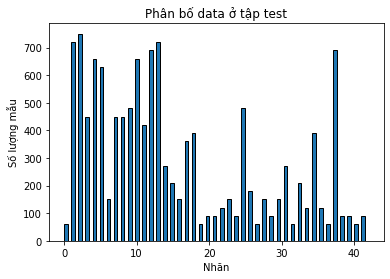

In [21]:
plt.hist(testY, bins=43, edgecolor='black', width=0.5)
plt.title('Phân bố data ở tập test')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu')
plt.show()

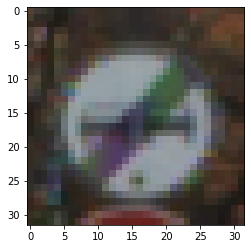

In [22]:
plt.imshow(trainX[75])

Đánh nhãn

In [23]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}



In [24]:
classNames[trainY[30]]

'End of no passing'

In [25]:
from sklearn.utils import shuffle

In [26]:
trainX, trainY = shuffle(trainX,trainY)

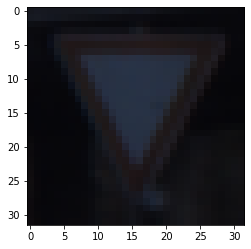

In [27]:
plt.imshow(trainX[30])


In [28]:
classNames[trainY[30]]

'Yield'

Chuẩn hóa dữ liệu về [0,1]

In [29]:
trainX = trainX.astype("float")/255.0
validX=validX.astype("float")/255.0
testX=testX.astype("float")/255.0
dataX=dataX.astype("float")/255.0

In [30]:
trainX[0]

array([[[0.56078431, 0.60392157, 0.70196078],
        [0.55294118, 0.60392157, 0.70588235],
        [0.54901961, 0.6       , 0.70588235],
        ...,
        [0.54901961, 0.6       , 0.70196078],
        [0.54509804, 0.6       , 0.70196078],
        [0.5372549 , 0.59215686, 0.69411765]],

       [[0.56078431, 0.60392157, 0.70196078],
        [0.55686275, 0.60392157, 0.70588235],
        [0.55294118, 0.60392157, 0.70588235],
        ...,
        [0.53333333, 0.6       , 0.70588235],
        [0.5372549 , 0.59607843, 0.70588235],
        [0.53333333, 0.58431373, 0.69019608]],

       [[0.54509804, 0.6       , 0.70196078],
        [0.55294118, 0.6       , 0.70196078],
        [0.55686275, 0.6       , 0.70196078],
        ...,
        [0.52941176, 0.59215686, 0.69803922],
        [0.5254902 , 0.58431373, 0.69019608],
        [0.52941176, 0.58431373, 0.68627451]],

       ...,

       [[0.48627451, 0.52156863, 0.61176471],
        [0.49019608, 0.52941176, 0.62352941],
        [0.48627451, 0

In [31]:
from sklearn.preprocessing import LabelBinarizer

In [32]:
lb =LabelBinarizer()
# inverse_transform - transform back from binary

In [33]:
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)
testY = lb.fit_transform(testY)
dataY = lb.fit_transform(dataY)

In [34]:
train["labels"]

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [35]:
trainY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
valid["labels"][0]

41

In [37]:
validY[40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

tăng cường dữ liệu

In [38]:
#xoay,zoom, dịch trái, lật
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True) 

input shape image

In [39]:
width = 32
height = 32
shape = (width, height, 3)

classes = 43

import thư viện 

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

import seaborn as sns
import pandas as pd

from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

import joblib

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [41]:
model = Sequential()


# Build model
### Xây dựng mô hình CNN(model1)

In [42]:
#Block 1

model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#Kiểm tra
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [43]:
#Tiếp tục với Block 2 và Block 3 theo ảnh mô hình mẫu

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#Kiểm tra
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [44]:
#Duỗi ra dạng vector
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [45]:
#Thu nhỏ dần về 43 lớp như trong mô hình
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [46]:
model.add(Dense(classes))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [47]:
#Cho ra kết quả có xác suất lớn nhất bằng hàm softmax
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [48]:
# learning rate
learning_rate = 0.01

# epochs
epochs = 10

# batch size 
batch_size = 64

In [49]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

compile thuật toán vào model để tối ưu

In [50]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Model1

In [51]:
 H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), 
                         steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

In [52]:
cd /content/drive/MyDrive/ML/saved_model/model1

/content/drive/MyDrive/ML/saved_model/model1


In [53]:
model.save("model_1.h5")

In [54]:
np.save('history_model_1.npy',H.history)

In [55]:
testY_label =  np.argmax(testY, axis=1)

Plot loss and accuracy

In [56]:
saved_history_model_1=np.load('history_model_1.npy',allow_pickle='TRUE').item()

Text(0.5, 0, 'epoch')

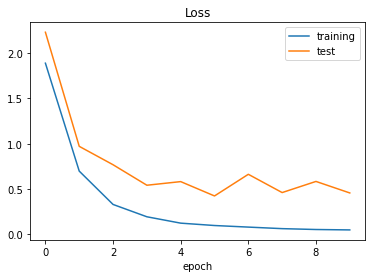

In [57]:
plt.plot(saved_history_model_1['loss'])
plt.plot(saved_history_model_1['val_loss'])
plt.legend(['training','test'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

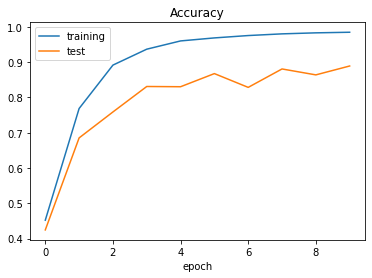

In [58]:
plt.plot(saved_history_model_1['accuracy'])
plt.plot(saved_history_model_1['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [59]:
saved_model_1 = tf.keras.models.load_model("model_1.h5")

Evaluation

In [60]:
model_1_score = saved_model_1.evaluate(testX, testY, verbose=1)

395/395 [==============================] - 20s 51ms/step - loss: 0.3614 - accuracy: 0.9107


In [61]:
print('Test Score:', model_1_score[0])
print('Test Accuracy:', model_1_score[1])

Test Score: 0.3614017069339752
Test Accuracy: 0.9106888175010681


Predict

In [62]:
model_1_predY_hat = saved_model_1.predict(testX)

In [63]:
model_1_predY_hat

array([[2.4132879e-07, 9.5558541e-08, 4.4773294e-08, ..., 5.1984186e-09,
        9.8856125e-11, 6.0998480e-07],
       [1.1037195e-05, 9.9216700e-01, 6.3269217e-05, ..., 3.8747388e-07,
        3.0911973e-09, 4.7196686e-08],
       [5.7397542e-12, 6.8203624e-13, 5.3909055e-10, ..., 1.2906060e-06,
        4.5613870e-08, 1.1479219e-09],
       ...,
       [2.8169129e-06, 1.5805331e-03, 8.5317786e-04, ..., 8.8098488e-05,
        3.3473548e-02, 3.7329281e-03],
       [2.9894429e-09, 2.1349324e-04, 6.9870812e-06, ..., 6.1837732e-06,
        1.0010917e-09, 2.8249126e-08],
       [8.8484615e-09, 1.7957866e-08, 1.8163408e-07, ..., 2.5205372e-07,
        1.1009307e-06, 1.9602978e-06]], dtype=float32)

In [64]:
model_1_predY = np.argmax(model_1_predY_hat, axis=1)

In [65]:
model_1_predY_hat

array([[2.4132879e-07, 9.5558541e-08, 4.4773294e-08, ..., 5.1984186e-09,
        9.8856125e-11, 6.0998480e-07],
       [1.1037195e-05, 9.9216700e-01, 6.3269217e-05, ..., 3.8747388e-07,
        3.0911973e-09, 4.7196686e-08],
       [5.7397542e-12, 6.8203624e-13, 5.3909055e-10, ..., 1.2906060e-06,
        4.5613870e-08, 1.1479219e-09],
       ...,
       [2.8169129e-06, 1.5805331e-03, 8.5317786e-04, ..., 8.8098488e-05,
        3.3473548e-02, 3.7329281e-03],
       [2.9894429e-09, 2.1349324e-04, 6.9870812e-06, ..., 6.1837732e-06,
        1.0010917e-09, 2.8249126e-08],
       [8.8484615e-09, 1.7957866e-08, 1.8163408e-07, ..., 2.5205372e-07,
        1.1009307e-06, 1.9602978e-06]], dtype=float32)

Đánh giá precision, recall & f1 score

In [66]:
testY_label =  np.argmax(testY, axis=1)

In [67]:
print(classification_report(testY_label, model_1_predY))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.95      0.93      0.94       720
           2       0.86      0.97      0.91       750
           3       0.91      0.93      0.92       450
           4       0.97      0.93      0.95       660
           5       0.87      0.94      0.90       630
           6       0.88      0.94      0.91       150
           7       0.91      0.90      0.91       450
           8       0.95      0.86      0.91       450
           9       0.98      0.99      0.98       480
          10       1.00      0.99      0.99       660
          11       0.96      0.93      0.95       420
          12       1.00      0.92      0.96       690
          13       0.99      0.97      0.98       720
          14       0.97      1.00      0.98       270
          15       0.98      1.00      0.99       210
          16       0.99      1.00      1.00       150
          17       1.00    

Xây dựng Confusion Matrix

In [68]:
c_matrix = metrics.confusion_matrix(testY_label, model_1_predY)

In [69]:
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [70]:
class_names= classNames.keys()
class_names

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])

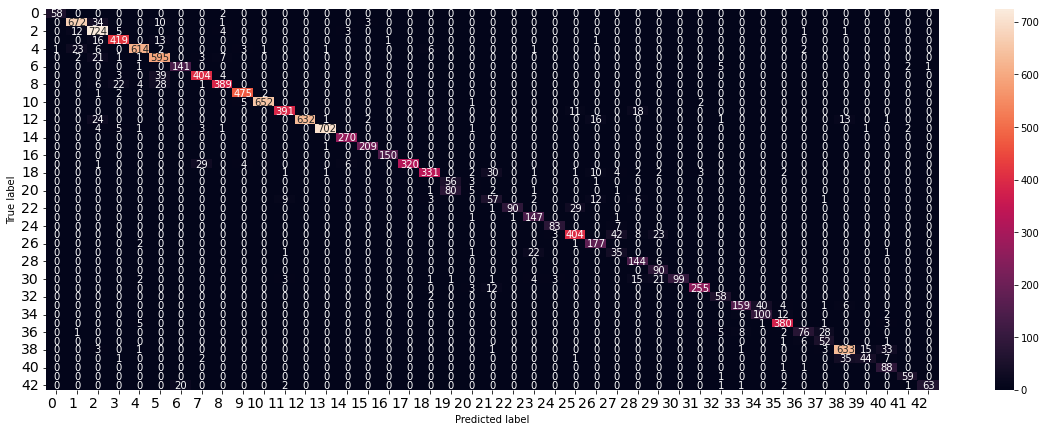

In [71]:
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

### Model 2

init model

In [72]:
def init_model():
  model = Sequential()
  
  #block1
  model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #block2
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())

  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())

  model.add(Dense(classes))

  model.add(Activation("softmax"))
  
  #Compile Model
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])  
  return model

In [73]:
model_2 = init_model()
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


start training

In [74]:
history_2 = model_2.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), 
                         steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

In [75]:
cd /content/drive/MyDrive/ML/saved_model/model2

/content/drive/MyDrive/ML/saved_model/model2


In [76]:
model_2.save("model_2.h5")

In [77]:
np.save('history_model_2.npy', history_2.history)

Plot loss & accuracy

In [78]:
saved_model_2 = tf.keras.models.load_model("model_2.h5")

In [79]:
saved_history_model_2 = np.load('history_model_2.npy',allow_pickle='TRUE').item()

In [80]:
def plot_model_history(saved_history_model, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(saved_history_model[acc]) + 1), saved_history_model[acc])
    axs[0].plot(range(1, len(saved_history_model[val_acc]) + 1), saved_history_model[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(saved_history_model[acc]) + 1), len(saved_history_model[acc]) / 10)
    axs[0].legend(['train', 'val'], loc='best')

    axs[1].plot(range(1, len(saved_history_model['loss']) + 1), saved_history_model['loss'])
    axs[1].plot(range(1, len(saved_history_model['val_loss']) + 1), saved_history_model['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(saved_history_model['loss']) + 1), len(saved_history_model['loss']) / 10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.savefig('history.png')

    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


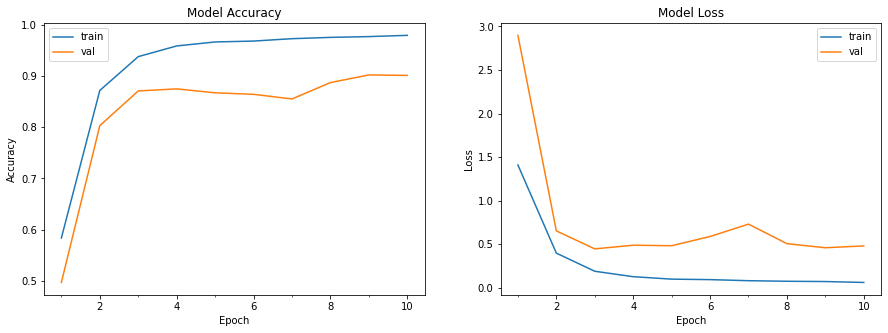

In [81]:
plot_model_history(saved_history_model_2)

Evaluation

In [82]:
score_model_2 = saved_model_2.evaluate(testX, testY, verbose=1)

395/395 [==============================] - 19s 47ms/step - loss: 0.4227 - accuracy: 0.9020


In [83]:
print('Test Score:', score_model_2[0])
print('Test Accuracy:', score_model_2[1])

Test Score: 0.4226953387260437
Test Accuracy: 0.901979386806488


Predict

In [84]:
model_2_predY_hat = saved_model_2.predict(testX)
model_2_predY = np.argmax(model_2_predY_hat, axis=1)

Đánh giá precision, recall & f1 score

In [85]:
print(classification_report(testY_label, model_2_predY))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        60
           1       0.92      0.98      0.95       720
           2       0.89      0.90      0.90       750
           3       0.84      0.92      0.88       450
           4       0.97      0.93      0.95       660
           5       0.90      0.98      0.94       630
           6       0.84      0.99      0.91       150
           7       0.94      0.97      0.96       450
           8       0.98      0.91      0.95       450
           9       0.98      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       1.00      1.00      1.00       420
          12       0.99      0.93      0.96       690
          13       1.00      0.97      0.98       720
          14       0.97      1.00      0.99       270
          15       1.00      0.98      0.99       210
          16       0.98      0.97      0.98       150
          17       1.00    

Confusion matrix

In [86]:
model_2_c_matrix = metrics.confusion_matrix(testY_label, model_2_predY)

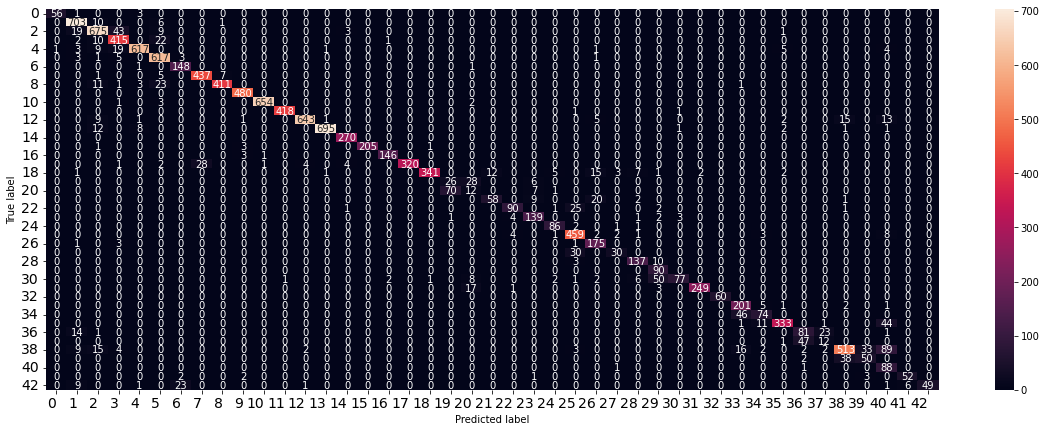

In [87]:
confusion_matrix(model_2_c_matrix, class_names, figsize = (20,7), fontsize=14)

Optimize

In [88]:
cd /content/drive/MyDrive/ML/saved_model/model2

/content/drive/MyDrive/ML/saved_model/model2


Tune and Numbers of epochs

In [93]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model_2_tune_epochs = KerasClassifier(build_fn=init_model, verbose=1)

# define the grid search parameters
epochs = [10, 20, 30]
param_grid = dict(epochs=epochs)
# param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model_2_tune_epochs, param_grid=param_grid, n_jobs=None, cv=3)
grid_results = grid.fit(trainX,trainY)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
725/725 [==============================] - 165s 224ms/step - loss: 0.3373 - accuracy: 0.9124
Epoch 2/10
725/725 [==============================] - 156s 215ms/step - loss: 0.0356 - accuracy: 0.9901
Epoch 3/10
725/725 [==============================] - 158s 219ms/step - loss: 0.0152 - accuracy: 0.9956
Epoch 4/10
725/725 [==============================] - 157s 216ms/step - loss: 0.0470 - accuracy: 0.9871
Epoch 5/10
725/725 [==============================] - 157s 217ms/step - loss: 0.0210 - accuracy: 0.9934
Epoch 6/10
725/725 [==============================] - 157s 217ms/step - loss: 0.0089 - accuracy: 0.9977
Epoch 7/10
725/725 [==============================] - 157s 217ms/step - loss: 0.0419 - accuracy: 0.9886
Epoch 8/10
725/725 [==============================] - 156s 215ms/step - loss: 0.0146 - accuracy: 0.9956
Epoch 9/10
725/725 [==============================] - 156s 216ms/step - loss: 0.0054 - accuracy: 0.9982
Epoch 10/10
363/363 [==============================] - 19s 51ms/

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
725/725 [==============================] - 154s 211ms/step - loss: 0.3564 - accuracy: 0.9044
Epoch 2/10
725/725 [==============================] - 153s 211ms/step - loss: 0.0279 - accuracy: 0.9929
Epoch 3/10
725/725 [==============================] - 153s 211ms/step - loss: 0.0119 - accuracy: 0.9969
Epoch 4/10
725/725 [==============================] - 151s 208ms/step - loss: 0.0588 - accuracy: 0.9840
Epoch 5/10
725/725 [==============================] - 153s 211ms/step - loss: 0.0091 - accuracy: 0.9972
Epoch 6/10
725/725 [==============================] - 151s 208ms/step - loss: 0.0081 - accuracy: 0.9973
Epoch 7/10
725/725 [==============================] - 151s 208ms/step - loss: 0.0451 - accuracy: 0.9869
Epoch 8/10
725/725 [==============================] - 152s 209ms/step - loss: 0.0065 - accuracy: 0.9982
Epoch 9/10
725/725 [==============================] - 153s 211ms/step - loss: 0.0094 - accuracy: 0.9972
Epoch 10/10
699/725 [===========================>..] - ETA: 5s -

KeyboardInterrupt: ignored

In [92]:
#save your model or results
joblib.dump(grid_results, 'model_2_opt_epochs.pkl')

NameError: ignored

In [91]:
#load your model for further usage
saved_model_2_tune_epochs = joblib.load("model_2_opt_epochs.pkl")

FileNotFoundError: ignored

In [ ]:
saved_model_2_tune_epochs.cv_results_

In [ ]:
saved_model_2_tune_epochs.best_params_

In [ ]:
# summarize results
print("Best: %f using %s" % (saved_model_2_tune_epochs.best_score_, saved_model_2_tune_epochs.best_params_))
means = saved_model_2_tune_epochs.cv_results_['mean_test_score']
stds = saved_model_2_tune_epochs.cv_results_['std_test_score']
params = saved_model_2_tune_epochs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
def plot_search_results(title, xlabel, grid_result):
  ylabel = "Accuracy"
  X = []
  Y = []
  error = []
  
  results = grid_result.cv_results_
  means_test = results['mean_test_score']
  stds_test = results['std_test_score']

  params_set = results['params']

  for i in range(len(params_set)):
    X.append(params_set[i][xlabel])
    Y.append(means_test[i])
    error.append(stds_test[i])

  plt.xlabel(xlabel)
  plt.title(title)
  plt.grid()
  plt.ylabel(ylabel)
  
  plt.errorbar(X, Y, error, linestyle='None', marker='o')

In [ ]:
title = "Thay đổi số lượng epochs"
xlabel = "epochs"
plot_search_results(title, xlabel, saved_model_2_tune_epochs)
# plt.savefig('model_2__tune_epochs.png', bbox_inches='tight')
plt.show()

In [ ]:
saved_model_2_tune_epochs_predY = saved_model_2_tune_epochs.predict(testX) 
saved_model_2_tune_epochs_predY

In [ ]:
# print classification report 
print(classification_report(testY_label, saved_model_2_tune_epochs_predY))

# Build final model

In [ ]:
def create_final_model():
  model = Sequential()
  
  #block1
  model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #block2
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())

  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())

  model.add(Dense(classes))

  model.add(Activation("softmax"))
  
  #Compile Model
  optimizer = SGD(learning_rate=0.1, momentum=0.5)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])  
  return model

In [ ]:
model_final = create_final_model()
model_final.summary()

In [ ]:
k_fold = StratifiedKFold(n_splits=5, random_state=7, shuffle=True)

In [ ]:
accs, precs, recs, f1s = [], [], [], []
batch_size = 64
epochs = 10
fold_idx = 1

In [ ]:
dataX.shape

In [ ]:
dataY

In [ ]:
dataY.argmax(1)

In [ ]:
for train_index, test_index in k_fold.split(dataX, dataY.argmax(1)):
  x_train, x_test = dataX[train_index], dataX[test_index]
  y_train, y_test = dataY[train_index], dataY[test_index]

  model = create_final_model()

  # #train
  print("Bắt đầu train Fold ", fold_idx)
  history = model.fit_generator(aug.flow(x_train, y_train, batch_size=batch_size), 
                          steps_per_epoch=x_train.shape[0]//batch_size, epochs=epochs, verbose=1)
  #predict
  y_pred_hat = model.predict(x_test)
  y_pred = np.argmax(y_pred_hat, axis=1)

  y_test_label =  np.argmax(y_test, axis=1)

  #tính các độ đo
  acc = accuracy_score(y_test_label, y_pred)
  prec = precision_score(y_test_label, y_pred, average='macro')
  rec = recall_score(y_test_label, y_pred, average='macro')
  f1 = f1_score(y_test_label, y_pred, average='macro')

  accs.append(acc)
  precs.append(prec)
  recs.append(rec)
  f1s.append(f1)
  print("Đã train xong Fold ", fold_idx)
  print(f'Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1-score: {f1}')

  # Chuyển sang fold tiếp theo
  fold_idx = fold_idx + 1

Đánh gíá

In [ ]:
cd /content/drive/MyDrive/ML/saved_model/model_final

In [ ]:
np.save("accs", accs)
np.save("precs", precs)
np.save("recs", recs)
np.save("f1s", f1s)
accs=np.load('/content/drive/MyDrive/ML/saved_model/model_final/accs.npy')
precs=np.load('/content/drive/MyDrive/ML/saved_model/model_final/precs.npy')
recs=np.load('/content/drive/MyDrive/ML/saved_model/model_final/recs.npy')
f1s=np.load('/content/drive/MyDrive/ML/saved_model/model_final/f1s.npy')

In [ ]:
# In kết quả tổng thể
print('* Chi tiết các fold')
for i in range(0, len(accs)):
  print(f'> Fold {i+1} - Acc: {accs[i]} - Precision: {precs[i]} - Recall: {recs[i]} - F1-score{f1s[i]}')

print('* Đánh giá tổng thể các folds:')
print(f'> Accuracy: {np.mean(accs)} (Độ lệch +- {np.std(accs)}), Precision: {np.mean(precs)}, Recall: {np.mean(recs)}, F1-score: {np.mean(f1s)}')


In [ ]:
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
plt.title("Đánh giá accuracy các fold")
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.bar(folds, accs)
plt.savefig('accs.png')

In [ ]:
plt.figure(figsize=[15, 10])
X = np.arange(len(accs))
plt.bar(X, precs, width = 0.25)
plt.bar(X + 0.25, recs, width = 0.25)
plt.bar(X + 0.5, f1s, width = 0.25)
# plt.bar(X + 0.75, f1s, color = 'r', width = 0.25)

plt.legend(['Precision', 'Recall', 'F1-score'])
plt.xticks([i + 0.25 for i in range(5)], folds)
plt.title("Đánh giá tổng thể các fold")
plt.xlabel('Folds')
plt.ylabel('Value')

plt.savefig('evaluation.png')
plt.show()